___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [39]:
import numpy as np
import pandas as pd
from apyori import apriori
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [40]:
df = pd.read_csv('Groceries.csv', header=None)

In [41]:
df.shape[0]

9835

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,long life bakery product,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [44]:
orders = []
for i in range(0, df.shape[0]):
    orders.append([str(df.values[i,j]) for j in range(0, df.shape[1]) if pd.notna(df.values[i,j])])

In [73]:
from collections import Counter

countr = Counter()
products_number = []

for order in orders:
    for i in order:
        products_number.append(i)
        countr[i] += 1
print("TOP3 products")
print(countr.most_common(3)[0])
print(countr.most_common(3)[1])
print(countr.most_common(3)[2])

TOP3 products
('whole milk', 2513)
('other vegetables', 1903)
('rolls/buns', 1809)


In [46]:
association_rules = apriori(orders, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

In [47]:
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: ", items[0], " - ", items[1] )

    print("Support: ", str(item[1]))

    print("Confidence: ", str(item[2][0][2]))
    print("Lift: ", str(item[2][0][3]))
    print("***************************")

Rule:  baking powder  -  whipped/sour cream
Support:  0.004575495678698526
Confidence:  0.25862068965517243
Lift:  3.607850330154072
***************************
Rule:  beef  -  root vegetables
Support:  0.017386883579054397
Confidence:  0.3313953488372093
Lift:  3.0403668431100312
***************************
Rule:  berries  -  whipped/sour cream
Support:  0.009049313675648195
Confidence:  0.27217125382262997
Lift:  3.796885505454703
***************************
Rule:  liquor  -  bottled beer
Support:  0.004677173360447382
Confidence:  0.4220183486238532
Lift:  5.240594013529793
***************************
Rule:  red/blush wine  -  bottled beer
Support:  0.004880528723945094
Confidence:  0.253968253968254
Lift:  3.1537598204264876
***************************
Rule:  flour  -  sugar
Support:  0.00498220640569395
Confidence:  0.28654970760233917
Lift:  8.46311223504206
***************************
Rule:  root vegetables  -  herbs
Support:  0.007015760040671073
Confidence:  0.4312499999999999

In [74]:
association_rules = apriori(orders, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
products = {}
i = 0
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    products[i] = [items[0] + " - " + items[1], item[1], item[2][0][2], item[2][0][3]]
    i += 1
data = pd.DataFrame(products, index = ['Pair', 'Support', 'Confidence', 'Lift']).T
data.sort_values('Support', ascending=False, inplace=True)
print("TOP2 pairs")
data.head(2)

TOP2 pairs


,Pair,Support,Confidence,Lift
1,beef - root vegetables,0.017387,0.331395,3.040367
37,root vegetables - tropical fruit,0.012303,0.342776,3.14478


***Conclusions***

1. Orders were analyzed using associative rules model
2. TOP3 products: 
   - whole milk, 2513
   - other vegetables, 1903
   - rolls/buns, 1809
3. TOP2 pairs:
    - beef - root vegetables
    - root vegetables - tropical fruit

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [49]:
df2 = pd.read_csv('Mall_Customers.csv',index_col=0)

In [50]:
df2.shape

(200, 4)

In [51]:
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


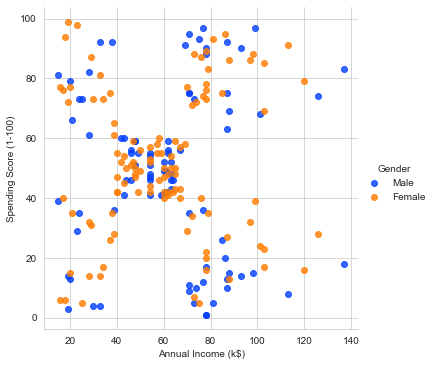

In [52]:
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)',data = df2, hue = 'Gender', palette = 'bright',fit_reg = False)

**We could see a clear separation into clusters on the plot above. Clusters depends on spending score and annual income
Other parameters can't give us such clasterization.**

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [54]:
kmeans.fit(df2.drop('Gender',axis=1))

KMeans(n_clusters=5)

In [55]:
kmeans.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348]])

In [56]:
kmeans.inertia_

75350.77917248776

In [57]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

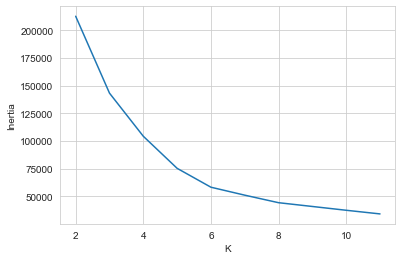

In [58]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df2.drop('Gender',axis=1))
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")
sns.set_style('whitegrid')

In [59]:
df2['Cluster'] = df2['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df2['Cluster'],kmeans.labels_))
print(classification_report(df2['Cluster'],kmeans.labels_))

[[33 19  9 18  9]
 [46 17 14 21 14]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.42      0.38      0.40        88
           1       0.47      0.15      0.23       112
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.25       200
   macro avg       0.18      0.11      0.12       200
weighted avg       0.45      0.25      0.30       200



Text(0, 0.5, 'Spending Score')

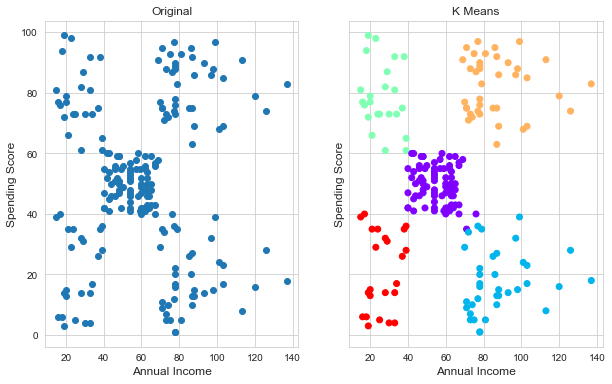

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title("Original")
ax1.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], cmap='rainbow')
ax1.set_xlabel('Annual Income', size=12)
ax1.set_ylabel('Spending Score', size=12)
ax2.set_title('K Means')
ax2.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'],c=kmeans.labels_,cmap='rainbow')
ax2.set_xlabel('Annual Income', size=12)
ax2.set_ylabel('Spending Score', size=12)

***Conclusions***

1. Dependecies for spending score and annual income were analyzed.
2. K-means model allowed as to separate 5 groups of customers:
- Cluster 1 (green). People live beyond their limits. They constantly use overdraft and spend more than they earn.
- Cluster 2 (violet). Group in center of graph, the biggest one. Those people have middle income and the same level of   expences.
- Cluster 3 (red). People with high income and high spend rate.
- Cluster 4 (orange). This group spend less money than they earn.
- Cluster 5 (lite blue). People have low income and don't spend much money.